In [0]:
#final delivery 2
#https://www.kaggle.com/datasets/georgejnr/used-and-new-cars-datasets

#Environmen Preparation

In [0]:
#pip install pysparkling

In [0]:
#pip install h2o

<div style="background-color:#F7CAC9; color:#4A3C31; padding:10px;">
    
# Data Understanding



</div>

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

In [0]:
spark=SparkSession.builder.appName('Used-Car-Price').getOrCreate()

In [0]:
#Understanding Data Types
df= spark.read.csv('/FileStore/tables/cleaned_car.csv',inferSchema=True,header=True)
df.printSchema()



root
 |-- #: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Mileage: string (nullable = true)
 |-- Price: string (nullable = true)
 |-- Manufacturer's Suggested Retail Price: string (nullable = true)
 |-- Price - MSRP: string (nullable = true)
 |-- Brand: string (nullable = true)



In [0]:
#Calculate the number of NA
columns = df.columns

for col in columns:
    null_count = df.filter(df[col].isNull()).count()
    print(f"Column '{col}' has {null_count} null values.")
    
total_null_count = df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).first()
total_null_count_dict = total_null_count.asDict()

print(f"Total null values in the dataframe: {total_null_count}")


Column '#' has 0 null values.
Column 'Model' has 0 null values.
Column 'Year' has 0 null values.
Column 'Status' has 0 null values.
Column 'Mileage' has 0 null values.
Column 'Price' has 0 null values.
Column 'Manufacturer's Suggested Retail Price' has 0 null values.
Column 'Price - MSRP' has 0 null values.
Column 'Brand' has 0 null values.
Total null values in the dataframe: Row(#=0, Model=0, Year=0, Status=0, Mileage=0, Price=0, Manufacturer's Suggested Retail Price=0, Price - MSRP=0, Brand=0)


In [0]:
df.show()

+---+--------------------+----+------+-------------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|      Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|Not available|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|Not available|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|Not available|57545.00|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|Not available|57745.00|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|Not available|47995.00|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|Not availa

In [0]:
df = df.drop('_c0')
df.show(10)

+---+--------------------+----+------+-------------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|      Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|Not available|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|Not available|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|Not available|57545.00|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|Not available|57745.00|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|Not available|47995.00|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|Not availa

In [0]:
element_count = df.groupBy('Mileage').count().orderBy('count', ascending=False)
element_count.show(7)

+-------------+-----+
|      Mileage|count|
+-------------+-----+
|Not available|47868|
|          310|  101|
|       23,000|   19|
|        1,000|   18|
|       29,000|   17|
|       35,000|   17|
|       45,000|   13|
+-------------+-----+
only showing top 7 rows



#Data Preparation

In [0]:
from pyspark.sql.types import IntegerType

In [0]:
#Clean up the Mileage column, mark the new car as 0 mi, then delete the characters and keep the numbers
from pyspark.sql.functions import col, when
df = df.withColumn("Mileage", when(col("Mileage") == "Not available", "0 mi.").otherwise(col("Mileage")))
df = df.withColumn('Mileage', regexp_replace(col('Mileage'), ' mi.', ''))
df = df.withColumn('Mileage', regexp_replace(col('Mileage'), ',', ''))
df.show()

+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545.00|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995.00|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|      0|49545.00|                        Not specified|   

In [0]:
#Change Mileage data type
df = df.withColumn("Mileage", when(col("Mileage").rlike("^[0-9]+$"), col("Mileage")).otherwise("0"))
df = df.withColumn("Mileage", col("Mileage").cast(IntegerType()))
df.printSchema()
df.show()

root
 |-- #: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- Price: string (nullable = true)
 |-- Manufacturer's Suggested Retail Price: string (nullable = true)
 |-- Price - MSRP: string (nullable = true)
 |-- Brand: string (nullable = true)

+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545.00| 

###Clean Price col

In [0]:
element_count_price = df.groupBy('Price').count().orderBy('count', ascending=False)
element_count_price.show(6)
price_count=df.select(col('Price')).count()
print('There are',price_count,'valid data in total')

+----------+-----+
|     Price|count|
+----------+-----+
|Not Priced|  652|
|  29995.00|  267|
|  34995.00|  245|
|  39995.00|  217|
|  72010.00|  201|
|  19995.00|  196|
+----------+-----+
only showing top 6 rows

There are 115762 valid data in total


In [0]:
#Since the proportion of not price data in the whole data is too small,  drop the not price data
df = df.filter(df.Price !='Not Priced')
df.select(col('Price')).count()


Out[106]: 115110

In [0]:
df.count()

Out[107]: 115110

In [0]:
len(df.columns)

Out[108]: 9

In [0]:
df = df.withColumn('Price', regexp_replace(col('Price'), ',', ''))
df.show()

+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|   Price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545.00|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995.00|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|      0|49545.00|                        Not specified|   

##Change Price data type

In [0]:
df = df.withColumn('price', regexp_replace(col('price'), '[$€£¥]', ''))

df.printSchema()
df.show(5)

root
 |-- #: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- price: string (nullable = true)
 |-- Manufacturer's Suggested Retail Price: string (nullable = true)
 |-- Price - MSRP: string (nullable = true)
 |-- Brand: string (nullable = true)

+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|   price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+--------+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895.00|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745.00|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545.00| 

In [0]:
df = df.withColumn('price', col('price').cast('integer'))
df.printSchema()
df.show(5)

root
 |-- #: integer (nullable = true)
 |-- Model: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Status: string (nullable = true)
 |-- Mileage: integer (nullable = true)
 |-- price: integer (nullable = true)
 |-- Manufacturer's Suggested Retail Price: string (nullable = true)
 |-- Price - MSRP: string (nullable = true)
 |-- Brand: string (nullable = true)

+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545|                  

##Status col understanding and cleaning

In [0]:
element_count_Status = df.groupBy('Status').count().orderBy('Status', ascending=False)
element_count_Status.show()


+--------------------+-----+
|              Status|count|
+--------------------+-----+
|Volkswagen Certified|  797|
|                Used|61627|
|    Toyota Certified|  183|
|   Porsche Certified| 1914|
|                 New|47434|
|  INFINITI Certified|  865|
|      Ford Certified|   29|
|     Dodge Certified|  388|
| Chevrolet Certified|  211|
|       BMW Certified|  609|
|     Acura Certified| 1053|
+--------------------+-----+



In [0]:
from pyspark.sql.functions import when, col
df = df.withColumn('Status', when(col('Status').isin(['Used', 'New']), col('Status')).otherwise('Certified'))

element_count_Status = df.groupBy('Status').count().orderBy('Status', ascending=False)
element_count_Status.show()

+---------+-----+
|   Status|count|
+---------+-----+
|     Used|61627|
|      New|47434|
|Certified| 6049|
+---------+-----+



##Extract the brand from the car model into a new column

In [0]:
from pyspark.sql.functions import split
df = df.withColumn('Brand', split(df['Model'], ' ').getItem(1))
df.show()

+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+
|  #|               Model|Year|Status|Mileage|price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|
+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895|                        Not specified|     #VALUE!|Acura|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545|                        Not specified|     #VALUE!|Acura|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995|                        Not specified|     #VALUE!|Acura|
|  5|2022 Acura TLX A-...|2022|   New|      0|49545|                        Not specified|     #VALUE!|Acura|
|  6|2023 

In [0]:
element_count_Brand = df.groupBy('Brand').count().orderBy('Brand', ascending=False)
element_count_Brand.show()

+-------------+-----+
|        Brand|count|
+-------------+-----+
|   Volkswagen| 9968|
|       Toyota| 5709|
|        Tesla| 9068|
|      Porsche| 9961|
|Mercedes-Benz|10100|
|        Lexus| 9965|
|     INFINITI| 8664|
|      Hyundai| 8280|
|         Ford| 4465|
|        Dodge| 9819|
|    Chevrolet| 9914|
|          BMW| 9827|
|        Acura| 9370|
+-------------+-----+



In [0]:
df.select('Mileage','price').describe().show()

+-------+-----------------+------------------+
|summary|          Mileage|             price|
+-------+-----------------+------------------+
|  count|           115110|            115110|
|   mean| 28279.3212579272| 51517.98868908001|
| stddev|38055.55058284511|37931.870683468806|
|    min|                0|              1800|
|    max|           974302|           2499900|
+-------+-----------------+------------------+



##Clean outliers

In [0]:
quantiles = {
    c: dict(
        zip(["q1", "q3"], df.approxQuantile(c, [0.25, 0.75], 0))
    )
    for c in ["price"]
}
quantiles

Out[117]: {'price': {'q1': 29980.0, 'q3': 61280.0}}

In [0]:
for i in quantiles:
    iqr = quantiles[i]['q3'] - quantiles[i]['q1']
    quantiles[i]['lower_bound'] = quantiles[i]['q1'] - (iqr * 1.5)
    quantiles[i]['upper_bound'] = quantiles[i]['q3'] + (iqr * 1.5)
print(quantiles)

{'price': {'q1': 29980.0, 'q3': 61280.0, 'lower_bound': -16970.0, 'upper_bound': 108230.0}}


In [0]:
import pyspark.sql.functions as f
df_clean=df.select(
    "*",
    *[
        f.when(
            f.col(c).between(quantiles[c]['lower_bound'], quantiles[c]['upper_bound']),
            0
        ).otherwise(1).alias(c+"_out") 
        for c in ["price"]
    ]
)
df_clean.show(10)

+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+---------+
|  #|               Model|Year|Status|Mileage|price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|price_out|
+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+---------+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895|                        Not specified|     #VALUE!|Acura|        0|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|        0|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545|                        Not specified|     #VALUE!|Acura|        0|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|        0|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995|                        Not specified|     #VALUE!|Acura|        0|
|  5|2022 Acura TLX A-...|2022|   New|  

In [0]:
from pyspark.sql.functions import col
df_clean=df_clean.withColumn("outliers", col("price_out"))
df_clean.show()

+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+---------+--------+
|  #|               Model|Year|Status|Mileage|price|Manufacturer's Suggested Retail Price|Price - MSRP|Brand|price_out|outliers|
+---+--------------------+----+------+-------+-----+-------------------------------------+------------+-----+---------+--------+
|  0|2023 Acura RDX A-...|2023|   New|      0|50895|                        Not specified|     #VALUE!|Acura|        0|       0|
|  1|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|        0|       0|
|  2|2023 Acura TLX Ty...|2023|   New|      0|57545|                        Not specified|     #VALUE!|Acura|        0|       0|
|  3|2023 Acura TLX Ty...|2023|   New|      0|57745|                        Not specified|     #VALUE!|Acura|        0|       0|
|  4|2023 Acura TLX A-...|2023|   New|      0|47995|                        Not specified|     #V

In [0]:
# dropping outliers
df_clean = df_clean.filter((df_clean.outliers == 0) )
df_clean=df_clean.select(["Model","Year", "Status", "Mileage","price","Manufacturer's Suggested Retail Price", "Brand"])
df.select('price','Mileage').describe().show()

+-------+------------------+-----------------+
|summary|             price|          Mileage|
+-------+------------------+-----------------+
|  count|            115110|           115110|
|   mean| 51517.98868908001| 28279.3212579272|
| stddev|37931.870683468806|38055.55058284511|
|    min|              1800|                0|
|    max|           2499900|           974302|
+-------+------------------+-----------------+



In [0]:
import numpy as np
print("proportion of the lost Rows: ",np.round((df.count()-df_clean.count())/df.count(),4))
#We only delete a small part of the data, which does not constitute a mailbox for subsequent processing

proportion of the lost Rows:  0.0712


#Data Visualization

In [0]:
df_clean.registerTempTable("dataclean")
display(sqlContext.sql("select * from dataclean"))

Model,Year,Status,Mileage,price,Manufacturer's Suggested Retail Price,Brand
2023 Acura RDX A-Spec,2023,New,0,50895,Not specified,Acura
2023 Acura TLX Type S,2023,New,0,57745,Not specified,Acura
2023 Acura TLX Type S,2023,New,0,57545,Not specified,Acura
2023 Acura TLX Type S,2023,New,0,57745,Not specified,Acura
2023 Acura TLX A-Spec,2023,New,0,47995,Not specified,Acura
2022 Acura TLX A-Spec,2022,New,0,49545,Not specified,Acura
2023 Acura MDX Type S w/Advance Package,2023,New,0,75590,Not specified,Acura
2023 Acura RDX A-Spec Advance,2023,New,0,55345,Not specified,Acura
2023 Acura RDX A-Spec Advance,2023,New,0,55045,Not specified,Acura
2023 Acura TLX Type S,2023,New,0,56445,Not specified,Acura


Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

Output can only be rendered in Databricks

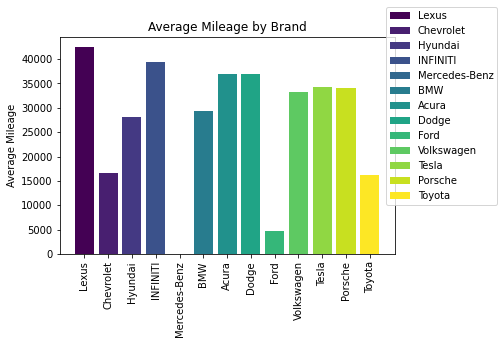

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a PySpark DataFrame called `df` with columns `Brand` and `Mileage`
# Group the DataFrame by `Brand` and compute the average mileage for each brand
avg_mileage_df = df.groupBy('Brand').avg('Mileage')

# Convert the PySpark DataFrame to a Pandas DataFrame
avg_mileage_pd = avg_mileage_df.toPandas()

# Get a list of unique brands and their counts
unique_brands = avg_mileage_pd['Brand'].unique()
num_brands = len(unique_brands)

# Create a color map using a colormap from matplotlib
cmap = plt.cm.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, num_brands))

# Create a figure and axis object using matplotlib
fig, ax = plt.subplots()

# Create a bar chart using matplotlib
bars = []
for i, brand in enumerate(unique_brands):
    brand_data = avg_mileage_pd[avg_mileage_pd['Brand'] == brand]
    bar = ax.bar(i, brand_data['avg(Mileage)'], color=colors[i])
    bars.append(bar)

# Set the title and axis labels
ax.set_title('Average Mileage by Brand')
ax.set_ylabel('Average Mileage')

# Set the x-axis tick labels to be the brands listed vertically
ax.set_xticks(np.arange(num_brands))
ax.set_xticklabels(unique_brands, rotation='vertical', ha='center')

# Create the color key in the far top right corner
fig.legend(bars, unique_brands, loc='upper right', bbox_to_anchor=(1.15, 1))

# Display the chart
plt.show()

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col, avg
from pyspark.sql.types import FloatType

# Assuming you have a PySpark DataFrame called `df` with columns `Brand` and `Mileage`

# Calculate the average mileage per brand
avg_mileage = df.groupBy("Brand").agg(avg(col("Mileage")).alias("avg_mileage"))

# Convert the PySpark DataFrame to a Pandas DataFrame
avg_mileage_pd = avg_mileage.toPandas()

# Create a color map
color_map = plt.get_cmap('Set1')

# Create a figure and axis object using matplotlib
fig, ax = plt.subplots()

# Set the color map for the bars
bar_colors = color_map(np.linspace(0, 1, len(avg_mileage_pd)))

# Create a bar chart using matplotlib
ax.bar(avg_mileage_pd["Brand"], avg_mileage_pd["avg_mileage"], color=bar_colors)

# Set the x-axis and y-axis labels
ax.set_xlabel("Brand")
ax.set_ylabel("Average Mileage")

# Rotate the x-axis tick labels to display the brand names vertically
plt.xticks(rotation=90)

# Create a color key in the top right corner
handles = [plt.Rectangle((0,0),1,1, color=bar_colors[i]) for i in range(len(avg_mileage_pd))]
labels = avg_mileage_pd["Brand"].values.tolist()
plt.legend(handles, labels, loc='upper right')

# Display the chart
plt.show()


<div style="background-color:#F7CAC9; color:#4A3C31; padding:10px;">

# Modeling

</div>

##Random Forest

In [0]:
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col

In [0]:
df1=df_clean
modelIndexer = StringIndexer(inputCol="Model", outputCol="ModelIndex")
statusIndexer = StringIndexer(inputCol="Status", outputCol="StatusIndex")
brandIndexer = StringIndexer(inputCol="Brand", outputCol="BrandIndex")
indexed = modelIndexer.fit(df_clean).transform(df_clean)
indexed = statusIndexer.fit(indexed).transform(indexed)
indexed = brandIndexer.fit(indexed).transform(indexed)
assembler = VectorAssembler(inputCols=["Year", "Mileage", "StatusIndex", "BrandIndex","ModelIndex"], outputCol="features")


In [0]:
data = assembler.transform(indexed).select("features", "price")

In [0]:
(trainingData, testData) = data.randomSplit([0.7, 0.3], seed = 1)
rf = RandomForestRegressor(featuresCol="features", labelCol="price", numTrees=10,maxBins=9000)
model = rf.fit(trainingData)
predictions = model.transform(testData)

<div style="background-color:#F7CAC9; color:#4A3C31; padding:10px;">
    
# Evaluation -- Random Forest

</div>

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="rmse")

rmse = evaluator.evaluate(predictions)
print("RMSE = %g" % rmse)

evaluator2 = RegressionEvaluator(labelCol="price", predictionCol="prediction", metricName="r2")

r2 = evaluator2.evaluate(predictions)
print("R-squared = %g" % r2)

RMSE = 11197
R-squared = 0.709745


In [0]:
importances = model.featureImportances.toArray()

# Create a dictionary of feature names and their corresponding importance scores
feature_importances = {}
for i in range(len(["Year", "Mileage", "StatusIndex", "BrandIndex","ModelIndex"])):
    feature_importances[["Year", "Mileage", "StatusIndex", "BrandIndex","ModelIndex"][i]] = importances[i]

# Print the feature importance scores in descending order
print("Feature Importance Scores:")
for feature, score in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print("{}: {}".format(feature, score))

Feature Importance Scores:
ModelIndex: 0.6692851590901026
Mileage: 0.09133401062202119
BrandIndex: 0.08312127414737364
StatusIndex: 0.0781721984451487
Year: 0.078087357695354


#H2O XGBoost

In [0]:
from pysparkling import *
from pyspark.sql import SparkSession
import h2o
from h2o.estimators import H2OXGBoostEstimator
from h2o.automl import H2OAutoML
from h2o.estimators import H2OGradientBoostingEstimator

In [0]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_345"; OpenJDK Runtime Environment (Zulu 8.64.0.19-CA-linux64) (build 1.8.0_345-b01); OpenJDK 64-Bit Server VM (Zulu 8.64.0.19-CA-linux64) (build 25.345-b01, mixed mode)
  Starting server from /local_disk0/.ephemeral_nfs/envs/pythonEnv-0848d4fd-f386-4e0f-96d8-a94ee02b2cd2/lib/python3.9/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkc7ybapl
  JVM stdout: /tmp/tmpkc7ybapl/h2o_root_started_from_python.out
  JVM stderr: /tmp/tmpkc7ybapl/h2o_root_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_root_cimxqk
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.297 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [0]:
num_rows = df_clean.count()

print("Number of rows:", num_rows)

Number of rows: 106911


##Due to the large amount of data, there is a lot of pressure on subsequent modeling, so 10% of the data is randomly sampled for modeling

In [0]:
sampled_df = df_clean.sample(fraction=0.1, seed=42)
sampled_df_1 = df_clean.sample(fraction=0.1, seed=44)
num_rows = sampled_df.count()

print("Number of rows:", num_rows)

Number of rows: 10705


In [0]:
sampled_df = sampled_df.drop('MSRP')

df2=sampled_df

In [0]:
df2 = df2.withColumn("Year", col("Year").cast(IntegerType()))

In [0]:
h2o_frame = h2o.H2OFrame(df2.toPandas())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [0]:
train, valid = h2o_frame.split_frame(ratios=[0.7])

# Define the predictor and response variables
predictors = h2o_frame.col_names[:-1]
response = "price"


In [0]:
aml = H2OAutoML(max_models=10, seed=1, include_algos=["XGBoost"])
aml.train(x=predictors, y=response, training_frame=train, validation_frame=valid)


AutoML progress: |
21:00:46.737: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_1_20230416_210046
 
 
 
 
 
 Model Summary: 
 
 number_of_trees 
 
 160.0 
 
 
 
 ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 133579611.98410389
RMSE: 11557.66464231005
MAE: 8337.23261635272
RMSLE: 0.2886892005866402
Mean Residual Deviance: 133579611.98410389 
 ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 172437008.62082624
RMSE: 13131.527276780345
MAE: 9345.615578205116
RMSLE: 0.31529877012097923
Mean Residual Deviance: 172437008.62082624 
 ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 165538379.55932832
RMSE: 12866.17190773263
MAE: 9120.580061951132
RMSLE: 0.312233483220858
Mean Residual Deviance: 165538379.55932832 
 
 
 
 
 Cross-Validation Metrics Summary: 
 
 mean 
 sd 
 cv_1_valid 
 cv_2_valid 
 cv_3_valid 
 cv_4_valid 
 cv_5_valid 
 mae 
 9120.631 
 192.80714 
 9047.704 
 8816.124 
 9200.877 
 9274.5625 
 9263.884 
 mean_residual_deviance 
 165539664.0000000 
 5790730.5 
 165959536.0000000 
 155505632.0000000 
 167742384.0000000 
 168554240.0000000 
 169936528.0000000 
 mse 
 165539664.0000000 
 5790730.5 
 165959536.0000000 
 155505632.0000000 
 167742384.0000000 
 168554240.0000000 
 169936528.0000000 
 r2 
 0.6146157 
 0.0130027 
 0.6172866 
 0.6357991 
 0.6057313 
 0.6109672 
 0.6032947 
 residual_deviance 
 165539664.0000000 
 5790730.5 
 165959536.0000000 
 155505632.0000000 
 167742384.0000000 
 168554240.0000000 
 169936528.0000000 
 rmse 
 12864.614 
 227.37033 
 12882.528 
 12470.189 
 12951.54 
 12982.844 
 13035.971 
 rmsle 
 0.3121579 
 0.0077743 
 0.3084070 
 0.3016737 
 0.3178348 
 0.3114916 
 0.3213828 
 
 
 
 
 
 
 
 Scoring History: 
 
 timestamp 
 duration 
 number_of_trees 
 training_rmse 
 training_mae 
 training_deviance 
 validation_rmse 
 validation_mae 
 validation_deviance 
 
 2023-04-16 21:01:28 
 16.617 sec 
 0.0 
 48700.3756657 
 44069.4604648 
 2371726589.9796648 
 48783.4406552 
 43996.9157862 
 2379824082.1567745 
 
 2023-04-16 21:01:28 
 16.801 sec 
 5.0 
 17216.8630556 
 12237.7172644 
 296420373.4748885 
 17901.8166697 
 12661.9834430 
 320475040.0765362 
 
 2023-04-16 21:01:28 
 16.868 sec 
 10.0 
 14857.2058563 
 11210.0325815 
 220736565.8553243 
 15600.5054961 
 11710.2095922 
 243375771.7353269 
 
 2023-04-16 21:01:28 
 16.939 sec 
 15.0 
 14469.4954628 
 11075.3094164 
 209366298.9486137 
 15228.8740559 
 11584.7037237 
 231918605.0090144 
 
 2023-04-16 21:01:28 
 17.029 sec 
 20.0 
 14210.3591608 
 10929.1503888 
 201934307.4792505 
 15011.6739389 
 11462.2427125 
 225350354.4487019 
 
 2023-04-16 21:01:28 
 17.093 sec 
 25.0 
 13981.6365813 
 10739.8233433 
 195486161.4904119 
 14870.9740742 
 11326.5817873 
 221145869.9153908 
 
 2023-04-16 21:01:28 
 17.157 sec 
 30.0 
 13754.4061508 
 10544.2989600 
 189183688.5612032 
 14736.5068551 
 11184.7330237 
 217164634.2898541 
 
 2023-04-16 21:01:28 
 17.223 sec 
 35.0 
 13583.0814863 
 10399.5385409 
 184500102.6621915 
 14565.4082253 
 11019.8793730 
 212151116.7693366 
 
 2023-04-16 21:01:28 
 17.294 sec 
 40.0 
 13425.2357153 
 10280.1580263 
 180236954.0116535 
 14418.7839522 
 10911.3604177 
 207901330.6588279 
 
 2023-04-16 21:01:28 
 17.361 sec 
 45.0 
 13285.6808556 
 10135.1610952 
 176509315.7965985 
 14327.0028726 
 10803.5406970 
 205263011.3114623 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 
 2023-04-16 21:01:30 
 18.806 sec 
 115.0 
 12048.7688924 
 8885.1521150 
 145172831.8235227 
 13426.0966097 
 9763.8094708 
 180260070.1720612 
 
 2023-04-16 21:01:30 
 18.952 sec 
 120.0 
 11988.4188789 
 8823.1664665 
 143722187.2161080 
 13394.5319940 
 9722.3656714 
 179413487.3387757 
 
 2023-04-16 21:01:30 
 19.058 sec 
 125.0 
 11914.8243489 
 8756.1186679 
 141963039.2646042 
 13364.4303922 
 9675.5826424 
 178607999.7071155 
 
 2023-04-16 21:01:30 
 19.178 sec 
 130.0 
 11863.1871005 
 8687.3374263 
 140735208.1823734 
 13322.8637220 

##XGBoost model evaluation

In [0]:
# View the leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))

model_id                                            rmse          mse       mae     rmsle    mean_residual_deviance
XGBoost_3_AutoML_1_20230416_210046               12866.2  1.65538e+08   9120.58  0.312233               1.65538e+08
XGBoost_grid_1_AutoML_1_20230416_210046_model_2  13279.9  1.76355e+08   9425.22  0.320545               1.76355e+08
XGBoost_grid_1_AutoML_1_20230416_210046_model_3  13809.3  1.90696e+08   9687.96  0.327966               1.90696e+08
XGBoost_grid_1_AutoML_1_20230416_210046_model_1  14215.2  2.02071e+08  10036.2   0.33566                2.02071e+08
XGBoost_2_AutoML_1_20230416_210046               14259.2  2.03325e+08  10119.8   0.337313               2.03325e+08
XGBoost_grid_1_AutoML_1_20230416_210046_model_7  14355.3  2.06074e+08  10380.1   0.337761               2.06074e+08
XGBoost_grid_1_AutoML_1_20230416_210046_model_4  15314.5  2.34533e+08  10999.3   0.358006               2.34533e+08
XGBoost_grid_1_AutoML_1_20230416_210046_model_6  15653.1  2.45019e+08  1

In [0]:
# Get the best XGBoost model
best_model = h2o.get_model(lb[0,"model_id"])

In [0]:
# Calculate feature importance
feature_importance = best_model.varimp(use_pandas=True)
print(feature_importance)

                                        variable  relative_importance  \
0                                        Mileage         1.353341e+12   
1                                           Year         4.230278e+11   
2                                    Status.Used         2.837048e+11   
3        Model.2023 Mercedes-Benz GLS 450 4MATIC         9.821358e+10   
4    Model.2023 Mercedes-Benz GLE 450 AWD 4MATIC         5.651668e+10   
..                                           ...                  ...   
320                                   Status.New         2.139291e+08   
321     Model.2005 Porsche 911 Carrera Cabriolet         2.069299e+08   
322                   Model.2015 Porsche Macan S         6.276205e+07   
323                Model.2015 INFINITI QX80 Base         6.142976e+07   
324          Model.2018 Volkswagen Atlas 3.6L SE         3.526298e+07   

     scaled_importance  percentage  
0             1.000000    0.370766  
1             0.312580    0.115894  
2           

##H2O Stacked Ensemble Model

In [0]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator, H2OXGBoostEstimator, H2OStackedEnsembleEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [0]:
target_col = "price"

sampled_df_1 = sampled_df_1.withColumn("Year", col("Year").cast(IntegerType()))
h2o_frame = h2o.H2OFrame(sampled_df_1.toPandas())

# Split data into training and validation sets
train, valid = h2o_frame.split_frame(ratios=[0.8], seed=123)

# Specify the predictor columns
predictors = ["Model", "Year", "Status", "Mileage", "Brand"]


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [0]:
gbm = H2OGradientBoostingEstimator(seed=123, ntrees=50, max_depth=5, nfolds=5, keep_cross_validation_predictions=True)
gbm.train(x=predictors, y=target_col, training_frame=train, validation_frame=valid)

xgb = H2OXGBoostEstimator(seed=123, ntrees=50, max_depth=5, nfolds=5, keep_cross_validation_predictions=True)
xgb.train(x=predictors, y=target_col, training_frame=train, validation_frame=valid)


gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
xgboost Model Build progress: |██████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_model_python_1681678832160_6
 
 
 
 
 
 Model Summary: 
 
 number_of_trees 
 
 50.0 
 
 
 
 ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 104643214.19235617
RMSE: 10229.526586912816
MAE: 7814.345544511346
RMSLE: 0.24429498498034535
Mean Residual Deviance: 104643214.19235617 
 ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 120130300.04229116
RMSE: 10960.39689255326
MAE: 8164.232084067427
RMSLE: 0.2591081861909469
Mean Residual Deviance: 120130300.04229116 
 ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 121430645.83255132
RMSE: 11019.557424531682
MAE: 8231.672791146479
RMSLE: 0.25836341675523034
Mean Residual Deviance: 121430645.83255132 
 
 
 
 
 Cross-Validation Metrics Summary: 
 
 mean 
 sd 
 cv_1_valid 
 cv_2_valid 
 cv_3_valid 
 cv_4_valid 
 cv_5_valid 
 mae 
 8230.01 
 115.73924 
 8224.899 
 8339.18 
 8106.8057 
 8354.202 
 8124.962 
 mean_residual_deviance 
 121468864.0000000 
 3835698.5 
 117347544.0000000 
 121687144.0000000 
 118281128.0000000 
 126819288.0000000 
 123209184.0000000 
 mse 
 121468864.0000000 
 3835698.5 
 117347544.0000000 
 121687144.0000000 
 118281128.0000000 
 126819288.0000000 
 123209184.0000000 
 r2 
 0.7137034 
 0.0037065 
 0.7115492 
 0.7183267 
 0.713106 
 0.7164301 
 0.709105 
 residual_deviance 
 121468864.0000000 
 3835698.5 
 117347544.0000000 
 121687144.0000000 
 118281128.0000000 
 126819288.0000000 
 123209184.0000000 
 rmse 
 11020.196 
 173.70514 
 10832.707 
 11031.189 
 10875.713 
 11261.407 
 11099.963 
 rmsle 
 0.2580859 
 0.0088697 
 0.2665030 
 0.2620752 
 0.2462525 
 0.2644226 
 0.2511764 
 
 
 
 
 
 
 
 Scoring History: 
 
 timestamp 
 duration 
 number_of_trees 
 training_rmse 
 training_mae 
 training_deviance 
 validation_rmse 
 validation_mae 
 validation_deviance 
 
 2023-04-16 21:03:07 
 9.706 sec 
 0.0 
 48903.5118441 
 44351.9808917 
 2391553470.6833568 
 48671.7136005 
 44057.2792642 
 2368935704.8137841 
 
 2023-04-16 21:03:07 
 9.771 sec 
 1.0 
 35742.1023824 
 31089.5123474 
 1277497882.7142630 
 35686.5527985 
 30960.4011705 
 1273530050.6374302 
 
 2023-04-16 21:03:07 
 9.789 sec 
 2.0 
 26776.4456792 
 21874.5200949 
 716978043.2103816 
 26858.0077356 
 21816.1936753 
 721352579.5237473 
 
 2023-04-16 21:03:07 
 9.812 sec 
 3.0 
 20925.9388157 
 15851.8046148 
 437894915.3169965 
 21082.6953453 
 15920.7013888 
 444480043.0240219 
 
 2023-04-16 21:03:07 
 9.831 sec 
 4.0 
 17250.2450082 
 12362.2688534 
 297570952.8412477 
 17506.5482513 
 12588.1726313 
 306479231.6749906 
 
 2023-04-16 21:03:07 
 9.851 sec 
 5.0 
 14972.7233064 
 10499.7270738 
 224182443.2087568 
 15336.8543204 
 10807.9610737 
 235219100.4454829 
 
 2023-04-16 21:03:07 
 9.872 sec 
 6.0 
 13671.7090294 
 9642.8663694 
 186915627.7853926 
 14099.3284833 
 9949.7022016 
 198791063.6788757 
 
 2023-04-16 21:03:07 
 9.893 sec 
 7.0 
 12897.2750577 
 9205.0227024 
 166339703.9139332 
 13320.1063270 
 9488.6044404 
 177425232.5617781 
 
 2023-04-16 21:03:07 
 9.914 sec 
 8.0 
 12437.9902803 
 9000.1742814 
 154703602.2122200 
 12879.0239892 
 9276.7201866 
 165869258.9139807 
 
 2023-04-16 21:03:07 
 9.942 sec 
 9.0 
 12109.5720279 
 8871.5876795 
 146641734.6999140 
 12538.2164605 
 9127.2866433 
 157206872.0093904 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 --- 
 
 2023-04-16 21:03:08 
 11.008 sec 
 41.0 
 10469.2573502 
 7996.4671656 
 109605349.4647867 
 11157.1118766 
 8338.0381298 
 124481145.4265448 
 
 2023-04-16 21:03:08 
 11.070 sec 
 42.0 
 10441.4199525 
 7980.4277895 
 109023250.6244440 
 11127.6722601 
 8323.0233325 
 123825089.9288239 
 
 2023-04-16 21:03:08 
 11.125 sec 
 43.0 
 10414.2808142 
 7958.7882228 
 108457244.8778402 
 11103.8425362 
 8301.3766951 
 123295319.0681658 
 
 2023-04-16 21:03:08 
 11.180 sec 
 44.0 
 10387.6373759 
 7938.0703276 
 107903010.2535611 
 11089.9299581 
 8290.0344148 
 122986546

In [0]:
stack = H2OStackedEnsembleEstimator(base_models=[gbm, xgb], seed=123)
stack.train(x=predictors, y=target_col, training_frame=train, validation_frame=valid)

stackedensemble Model Build progress: |██████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),1/2
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,AUTO
Metalearner nfolds,0
Metalearner fold_column,None
Custom metalearner hyperparameters,None


In [0]:
predictions = stack.predict(valid)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


##Stacked Ensemble Model Evaluation

In [0]:
stacked_ensemble_perf = stack.model_performance(test_data=valid)
mse = stacked_ensemble_perf.mse()
rmse = stacked_ensemble_perf.rmse()
mae = stacked_ensemble_perf.mae()
r2 = stacked_ensemble_perf.r2()

print("Stacked Ensemble Model Performance:")
print("MSE: {:.4f}".format(mse))
print("RMSE: {:.4f}".format(rmse))
print("MAE: {:.4f}".format(mae))
print("R^2: {:.4f}".format(r2))

Stacked Ensemble Model Performance:
MSE: 61381722.8219
RMSE: 7834.6489
MAE: 5002.5187
R^2: 0.8565
